<a href="https://colab.research.google.com/github/Norwrongcl/ADA-Informes/blob/main/MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Máximo SubArreglo

**Entrada**: Cadena de n números $[a_1,a_2,...,a_n]$

**Salida**: Suma del sub arreglo máximo y sus indices de inicio y de final.

![image](https://media.geeksforgeeks.org/wp-content/uploads/maximum-subarray-sum-is-7.jpg)

Este algoritmo presentado en el informe se baza el paradigma de divide y venceras, esto quiere decir que el algoritmo dividira la lista el elementos cada vez mas pequeños y para luego determinar qué sub arreglo presenta la suma máxima.
El problema fue propuesto originalmente por **Ulf Grenander** de la *Brown University* en $1977$, como un modelo simplificado para la estimación de máxima probabilidad de patrones en imágenes digitalizadas. Aunque este algoritmo, es poco eficiente para esto. Al terminar de presentarlo, sera comparado con otros algoritmos que resuelven de manera más eficiente este problema.


# 2. MaxSubArray 

El siguiente código muestra una implementación del algoritmo **maxArray**.

In [36]:
import random
from termcolor import cprint

def maxmid(arr, start, mid, end, verbose):
  
  sum= 0
  maxl= -1000000000
  maxr= -1000000000

  for i in range (mid, start-1, -1):
    sum+= arr[i]
    if sum> maxl: 
      maxl= sum
      maxleft= i
  
  sum= 0

  for j in range (mid+1, end+1):
    sum+= arr[j]
    if sum> maxr:
      maxr= sum
      maxright= j

  return (maxr+maxl), maxleft, maxright

def maxArray(arr,start,end, verbose=True):

  if start==end: return arr[start], start, end

  mid= (start+end)//2
  maxl, startl, endl= maxArray(arr, start, mid, verbose)
  maxr, startr, endr= maxArray(arr, mid+1, end, verbose)
  maxm, startm, endm= maxmid(arr, start, mid, end, verbose)

  if max(maxl, maxr, maxm)==maxl:
    if verbose==True:
      cprint(f"La suma máxima de la izquierda es ahora: {arr[startl:endl+1]} y es {maxl}\n", 'red', attrs=['bold'])
    return maxl, startl, endl
  if max(maxl, maxr, maxm)==maxm:
    if verbose==True:
      cprint(f"La suma máxima del medio es ahora: {arr[startm:endm+1]} y es {maxm}\n", 'white', attrs=['bold'])
    return maxm, startm, endm
  if max(maxl, maxr, maxm)==maxr:
    if verbose==True:
      cprint(f"La suma máxima de la derecha es ahora: {arr[startr:endr+1]} y es {maxr}\n", 'blue', attrs=['bold'])
  return maxr, startr, endr   
  


## Prueba de código ##

n= random.randint(2,10)
list= random.sample(range(-100,100),n)
cprint(f"Entrada: {list}\n", 'yellow', attrs=['bold', 'underline'])
maxSum, sindex, eindex= maxArray(list,0,len(list)-1, verbose=False)

cprint(f"Indice inicial del SubArreglo: {sindex}", 'green', attrs=['bold'])
cprint(f"Indice final del SubArreglo: {eindex}\n", 'green', attrs=['bold'])
cprint(f"SubArreglo con Suma Máxima: {list[sindex:eindex+1]}\n", 'cyan',attrs=['bold'])
cprint(f"Suma Maxima del SubArreglo: {maxSum}\n", 'magenta', attrs=['bold','underline'])
c_h_i(maxSum)

Entrada: [92, 76, 46, -82, -8, -69, -33, 97, -48, -54]

Indice inicial del SubArreglo: 0
Indice final del SubArreglo: 2

SubArreglo con Suma Máxima: [92, 76, 46]

Suma Maxima del SubArreglo: 214

🟦🟦🟦⬜⬜⬜⬜⬜
🟦214🟦⬜⬜⬜⬜⬜
🟦🟦🟦⬜⬜⬜⬜⬜  Se viene
🟥🟥🟥🟥🟥🟥🟥🟥   SEPTIEMBRE 🥵
🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥


## 2.2. Descripción del algoritmo

*MaxSubArray*, utiliza el paradigma de divide y venceras dividiendo la lista en partes cada vez más pequeñas hasta que solo quedan los elementos separados. A partir de ahí, comienza a sumar estas partes,  y asegurando el mayor valor obtenido.

El algoritmo recibe como entrada una lista (o arreglo) $L$ con la secuencia de $n$ elementos que queremos analizar. Luego, esta lista es dividida en partes hasta que quede un elemento en la última división.

1. La lista se divide a la mitad en cada llamada recursiva hasta obtener dos elementos adyacentes, siempre verificando que el largo de esta lista no sea 1.

2. Mientras la lista se va dividiendo, va guardando la suma de los valores de estos subarreglos.

3. Al final de este bucle, se comparan los valores de las sumas máximas obtenidas, y retorna la que fue mayor.

4. Al final, se imprime en pantalla la lista o arreglo y retorna una suma que es la mayor obtenida además de el valor del indice inicial más el final: `maxSum, startmaxsum, endmaxsum`.


![image](https://i.imgur.com/Q0iMlIQ.png)

Cuando la variable `verbose` == `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.3. Ejemplo

###### Consideremos, por ejemplo, la lista:

*List* = $[4,3,-5,1]$

###### En la primera pasada dividimos la lista en 2:

*l* = $[4,3]$  y *r* =$[-5,1]$

###### Luego, en la segunda pasada cada lista se divide en otras 2:

*l.l* = $[4]$ y *l.r* = $[3]$ ;  *r.l* = $[-5]$ y *r.r* = $[1]$

###### Luego, viene la parte  de "**Conquistar**", donde empezamos a rearmar y comparar:

aquí `sum l.l` = $4$ y `sum l.r` = $3$ y `sum r.l` = $-5$ y `sum r.r` = $1$

*l* = $[4,3]$  y *r* =$[-5,1]$, aquí `sum l` = $7$ y `sum r` = $-4$

###### Mientras que *l+r* = $[4,3,-5]$ donde `sum` = $2$ y luego:

*l+r* = $[4,3,-5,1]$ donde `sum` = $3$

#### Entonces como resultado obtenemos que la suma máxima obtenida es 7 cuyo subarreglo que la forma es $[4,3]$ y los indices iniciales y finales son 0 y 1 respectivamente



## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.



In [23]:
def newcolor():
  colors=['red','blue','magenta','green','yellow','cyan']
  selectcolor=random.randint(0,5)
  color= colors[selectcolor]
  return color
colr=newcolor()

large= random.randint(1,6)
List = random.sample(range(-100, 100), large)

cprint(f"Largo del arreglo: {large}",colr,attrs=['bold','dark'])
colr=newcolor()
cprint(f"Entrada: {List}\n",colr,attrs=['bold','dark'])
colr=newcolor()
maxSum, sindex, eindex= maxArray(List, 0, len(List)-1, verbose=True)
cprint(f"Indice inicial del SubArreglo: {sindex}", colr, attrs=['bold'])
colr=newcolor()
cprint(f"Indice final del SubArreglo: {eindex}\n", colr, attrs=['bold'])
colr=newcolor()
cprint(f"SubArreglo con Suma Máxima: {List[sindex:eindex+1]}\n", colr,attrs=['bold'])
colr=newcolor()
cprint(f"Suma Maxima del SubArreglo: {maxSum}\n", colr, attrs=['bold','underline'])

Largo del arreglo: 6
Entrada: [41, 87, -54, -40, 69, 55]

La suma máxima del medio es ahora: [41, 87] y es 128

La suma máxima de la izquierda es ahora: [41, 87] y es 128

La suma máxima de la derecha es ahora: [69] y es 69

La suma máxima del medio es ahora: [69, 55] y es 124

La suma máxima del medio es ahora: [41, 87, -54, -40, 69, 55] y es 158

Indice inicial del SubArreglo: 0
Indice final del SubArreglo: 5

SubArreglo con Suma Máxima: [41, 87, -54, -40, 69, 55]

Suma Maxima del SubArreglo: 158



# 3. Correctitud

### **Teorema (Correctitud) de maxmid .**

*El algoritmo **maxmid** retorna el resultado de la suma máxima de los valores consecutivos de un subarreglo $[i,...,j]$ que pase por el medio y contiene los elementos de un arreglo $[a_1,a_2,a_3,...a_n]$.*

## Prueba del Teorema
**Propiedad invariante de bucle**:

>Al comienzo de cada i-ésima iteración en cada ciclo *for*, las sumatorias `maxl` y `maxr` contendrán la suma máxima contenida entre los subarreglos $arr[i:mid]$ y $arr[mid+1:j]$, siendo `mid` la mitad del arreglo `arr`, donde $min \leq i \leq mid$ y $mid+1 \leq j \leq max$.

**Inicialización:**

>Antes de comenzar la primera iteración en ambos bucles, se asume que los elementos $arr[mid]$ y $arr[mid+1]$ son la máxima suma en esos momentos y los valores $maxleft$ y $maxright$ son iguales a $0$, por lo que la suma máxima en el arreglo es igual a este número.



**Mantención:**

> Al comenzar cada iteración, esta analiza si la suma total del subarreglo $arr[mid−i,...,mid]$ da como resultado una suma mayor a la registrada en la iteración anterior. En caso de ser verdadero, el valor anterior tomará el valor de la nueva suma máxima encontrada. Lo mismo pasará al momento de analizar la suma en el subarreglo $arr[mid+1,...,mid+j+1]$ por cada j-ésima iteración.

![image](https://i.imgur.com/7MHDcXx.png)

> Luego, si ambos subarreglos son los máximos encontrados (es decir, la suma máxima se encuentra entre estos 2), se suman todos los valores consecutivos entre  $arr[i]$  y  $arr[j]$ , el resultado de esto, entregara la suma máxima de este subarreglo que contiene elementos del arreglo original.

**Correctitud**

> Como la propiedad se cumple tanto antes como durante la ejecución de ambos bucles, podemos confirmar que el teorema es correcto, y al finalizar la i-ésima iteración la función nos retornará la suma máxima de elementos consecutivos del arreglo $[ai,...,aj]$.




# 3.1 Correctitud

### **Teorema (Correctitud) de maxArray .**

*El algoritmo **subMaxArray** retorna la suma máxima de un subarreglo de elementos pertenecientes al arreglo original $[i,...,j]$.

## Prueba del Teorema

Como es una función con enfoque en divide y vencerás, es una función recursiva y por lo tanto la podemos analizar usando **inducción matemática**.

>**Caso inicial:**

Con $n=1$
Como el arreglo es de solo un elemento, la suma máxima es el mismo elemento, por lo que se retorna este, cumpliéndo así $P(1)$.



>**Inducción:**

Para $n=1$ --> $P(1)$

Entonces Para $n>1$ :

El algoritmo divide el arreglo recursivamente en dos subarreglos de tamaño  n/2, L y R , buscando en cada uno de ellos cuál contiene la suma máxima.

Además, esta función llama a la función **maxmid**, por lo que también retornará la respectiva suma máxima que pase por el medio del arreglo original.

Como el tamaño de los subarreglos L y R son menores a n, si seguimos llamando a la función podemos asumir que esta efectivamente sí retornarán la respectiva suma máxima.

Finalmente, como la función retorna la suma máxima entre las tres que fueron encontradas, se puede concluir que la función **maxArray** es correcta.





# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **maxArray** tiene un **tiempo de ejecución de** $O(n*log (n))$ aunque sea una lista o arreglo independientemente de su orden, esto se debe a que sin importar del orden, el algoritmo siempre dividira el arreglo hasta el último elemento.

## Prueba del teorema

**Ecuación Recurrente:**

$T(n)= \left\{ \begin{array}{lcc}
             O (1) & n \ is \ small \\
             2T (n/2) + O(n) &  n > 1 \\
             \end{array}
   \right.$

######Descripción:

El tamaño del problema es un arreglo de $n$ elementos, el cual asumiremos, es una potencia de 2. Nuestro algoritmo divide cada problema en 2 "subproblemas", siendo cada uno la mitad anterior.

Por otro lado, la complejidad de la función **maxmid** es $O(n)$, debido a que se debe recorrer todo el arreglo en busca del máximo en el medio.

Sabiendo esto podemos formar nuestro **Árbol de recurrencia**, que se vería algo así:

![image](https://i.imgur.com/JyhCSPw.png)


# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente:

* Comparación  de una implementacion realizada con un MaxSubArray implementado con el Algoritmo de Kadane.

* Comparación del algoritmo Kadane y maxArray con un arreglo ordenado.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre -100 y 100.

In [27]:
### KADANE ###

def kadane(arr):
  maxSum= 0
  Sum= 0
  for i in arr:
    Sum+= i
    if Sum< 0:
      Sum= 0
    if maxSum< Sum:
      maxSum= Sum
  return maxSum

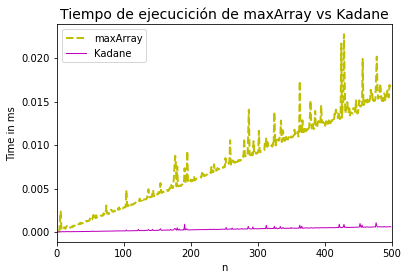

In [50]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x= []
y=[]
y1=[]
flag=False
for n in range(2,500):
  List= random.sample(range(-1000, 1000), n)
  t1= repeat(setup="from __main__ import maxArray", stmt= f"maxArray({List}, {0}, {len(List)-1},{flag})", repeat= 1, number= 10)
  y.append(t1)
  t2= repeat(setup="from __main__ import kadane", stmt= f"kadane({List})", repeat= 1, number= 10)
  y1.append(t2)
  x.append(n)


plt.plot(x,y,"y--",lw=2)
plt.plot(x,y1,"m-",lw=1)
plt.xlim(0,500)
plt.legend(["maxArray","Kadane"])

plt.title("Tiempo de ejecucición de maxArray vs Kadane", fontsize=14)
plt.xlabel('n')
plt.ylabel('Time in ms')
plt.show()

### Análisis de resultados

En el gráfico se puede apreciar que, como cabía de esperar, el algoritmo de Kadane es significativamente mucho más rápido que maxArray, Esto se debe a que su complejidad temporal es menor, específicamente, es O(n).

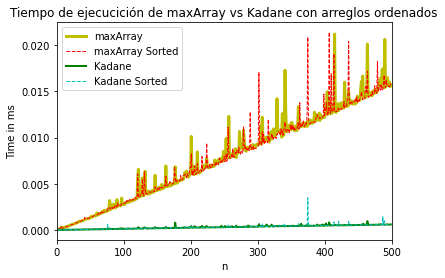

In [62]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def grafic(zoom):
  x= []
  y=[]
  y1=[]
  y2=[]
  y3=[]

  flag=False
  for n in range(2,500):
    List= random.sample(range(-1000, 1000), n)
    t1= repeat(setup="from __main__ import maxArray", stmt= f"maxArray({List}, {0}, {len(List)-1},{flag})", repeat= 1, number= 10)
    y.append(t1)
    t2= repeat(setup="from __main__ import kadane", stmt= f"kadane({List})", repeat= 1, number= 10)
    y1.append(t2)
    x.append(n)
    List=sorted(List)
    t3= repeat(setup="from __main__ import maxArray", stmt= f"maxArray({List}, {0}, {len(List)-1},{flag})", repeat= 1, number= 10)
    y2.append(t3)
    t4= repeat(setup="from __main__ import kadane", stmt= f"kadane({List})", repeat= 1, number= 10)
    y3.append(t4)



  plt.plot(x,y,"y-",lw=3)
  plt.plot(x,y2,"r--",lw=1)
  plt.plot(x,y1,"g-",lw=2)
  plt.plot(x,y3,"c--",lw=1)
  plt.xlim(0,zoom)
  plt.legend(["maxArray","maxArray Sorted","Kadane","Kadane Sorted"])

  plt.title("Tiempo de ejecucición de maxArray vs Kadane con arreglos ordenados", fontsize=12)
  plt.xlabel('n')
  plt.ylabel('Time in ms')
  plt.show()

grafic(500)

### Análisis de resultados

A pesar de que los arreglos están ordenados, la diferencia que se puede apreciar es mínima, pero lo que más llama la atención es que con la función **maxArray** se pueden apreciar pequeñas diferencias a pesar de que no existen mejores o peores casos, lo que podría hacer pensar que quizás sea debido al rendimiento del hardware de la máquina que ejecuta el algoritmo.

Igualmente, dejaré un gráfico con más zoom.


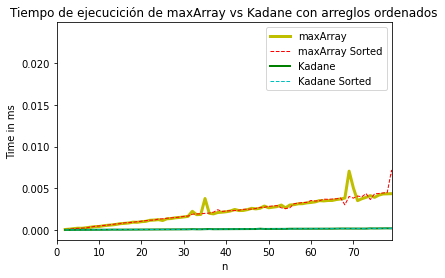

In [67]:
x=random.randint(60,100)
grafic(x)

In [9]:
def c_h_i(x):
  print("🟦🟦🟦⬜⬜⬜⬜⬜")
  print(f"🟦{x}🟦⬜⬜⬜⬜⬜")
  print("🟦🟦🟦⬜⬜⬜⬜⬜  Se viene")
  print("🟥🟥🟥🟥🟥🟥🟥🟥   SEPTIEMBRE 🥵")
  print("🟥🟥🟥🟥🟥🟥🟥🟥")
  print("🟥🟥🟥🟥🟥🟥🟥🟥")
